<div class="title">第一章 Vue 基础</div>
<div class="center">《Web设计》</div>

# 大纲
1. Vue介绍
2. 使用方式
3. Vue应用(app)
4. 模板语法: 文本插值、raw HTML, attribute绑定，指令
5. 响应性基础
6. 计算属性
7. class和style绑定
8. 条件渲染(if)
9. 列表渲染(for)
10. 课程信息

# 介绍

Vue 是一款渐进式的Javascript前端框架, 基于标准的html, css, javascript
* 核心关注点是MVC模式中的视图层（用户界面的构建）
* 核心功能强调的是数据状态到用户界面的映射 <span class=".warn">UI=VM(State)</span>，更像是一个视图模板引擎
* 加上组件系统、客户端路由、大规模状态管理等，构成一个框架（这些功能相互独立，可以自行选择）


核心特征：
- 声明式渲染：通过扩展html模板, 基于程序内部JS数据状态“声明式”地描述html输出
- 响应性：自动跟踪JS数据状态的变化，并高效地更新DOM（界面、视图）

MVC,MVP,MVVM模式都是将应用划分成三个部分：
* M（model）：模型---javascript object,代表真实情况的内容（一个面向对象的方法）、或表示内容（以数据为中心的方法）的数据访问层
* V（view）：视图---用户界面（UI）
* C (controller): 控制器
* Viewmodel：在vue中指vue实例对象，是一个公开公共属性和命令的抽象的view；是一个转值器，负责转换Model中的数据对象，来让对象变得更容易管理和使用。
#### MVC模式
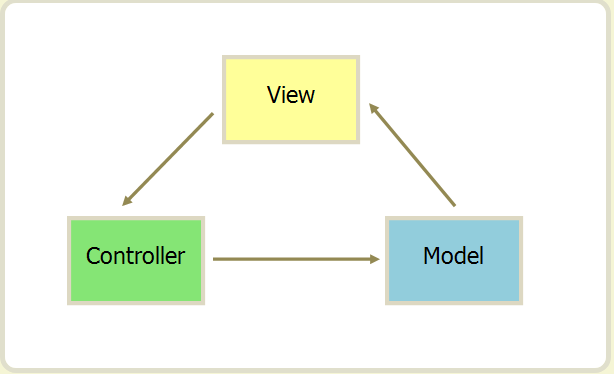

#### MVP模式
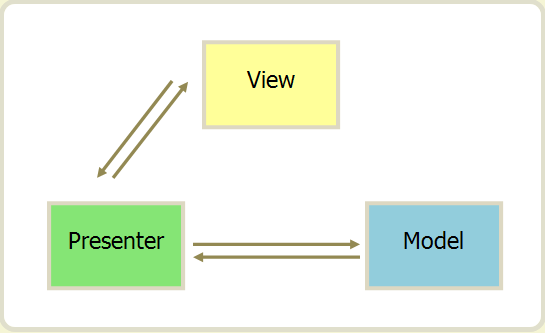

#### MVVM模式
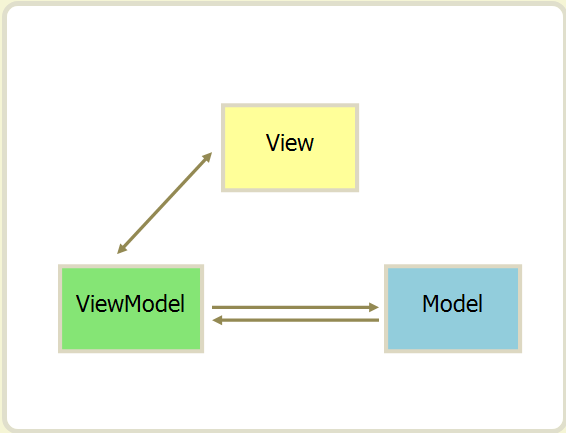

<small>本文为CSDN博主「赏花赏景赏时光」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。原文链接：https://blog.csdn.net/tangxiujiang/article/details/79594860</small>

虽然Vue没有完全遵循MVVM模式，在Vue经常使用`vm`这个变量名来表示组件实例
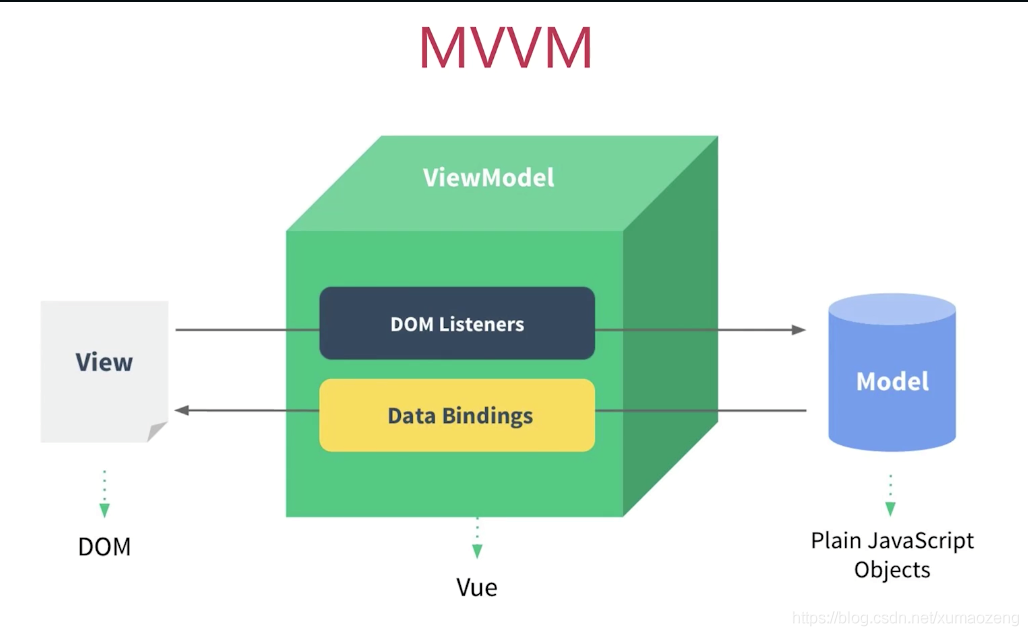

##  Vue 使用场景
1. 作为独立的前端脚本（无后端构建），嵌入到（一般是已有的）html页面（`<script>`标签）
    - 用于实现一些简单的前端逻辑，增强静态页面的功能
    - 可以看作一种JQuery的替代，更具有“声明式”
2. 构造可复用的组件，嵌入到（任意的）html页面
    - 组件的设计者对于组件的”使用者“是不知情的，可以设计一些通用的组件，供不同类型的页面（使用者）使用
3. 单文件应用(Single Page Application, SPA)
    - 对于有着复杂的交互或者状态逻辑，使用SPA可以在不重新加载页面的情况下来控制数据的更新和导航
    

4. FullStack/SSR (server side rendering)：后端在前端请求时将Vue应用（动态）生成html网页
    - 用于SEO（搜索引擎优化）；
    - 这些html也会发送到前端，用户可以在等待JS下载和解析前，看到初始的静态界面（Vue会将该静态的界面转换成可交互状态）
5. JAMStack/SSG (server side generating)：后端提前将Vue应用生成静态的html网页
    - 可用于静态站点，例如：Github Pages, Coding.net Pages
    - 两个官方的工具[vitepress](https://vitepress.vuejs.org/) [vuepress](https://vuepress.vuejs.org/)    

两种API风格：
1. 选项式(Option): 
    * 使用对象的一些选项（也就是属性）来定义组件的逻辑，常见的选项有：data, methods, template, computed, components
    * 直观易上手，不适合大项目（大型组件中的一个功能，需要分散在不同的选项中）
2. 组合式(Composition): 使用导入的一些API函数来定义组件的逻辑，表现形式为相应的函数调用
    * 更灵活强大（可以灵活组合代码和复用）
    * 增长式的（可以与选项式混用）
    
我们先学习选项式，后面再学组合式

## Hello world例子（选项式API）


```html
<div id="app">
    {{msg}}
</div>
<script src="https://unpkg.com/vue"></script>
<script>
    const Root = {
        data() {
            return {
                msg: "Hello, world!"
            }
        }
    }
    const app = Vue.createApp(Root);
    const vm = app.mount('#app');
</script>
```

# 使用方式
1. 有构建：先在后端编译，然后浏览器才能解析，更灵活强大
    * 使用NodeJS构建
    * 可以用于单文件组件（Single File Components, SFC)方式
2. 没有构建：直接由浏览器解析，使用`<script>`标签导入，更简单方便
    * 传统的`<script>`方式, 一次性导入, 所有API都暴露于`Vue`
    ```html
    <script src="https://unpkg.com/vue"></script>

    ```
    * 使用ES Modules按需（动态）导入，需要通过http协议来打开网页（直接打开本地文件使用的是file协议），建议用vscode插件live server

## 使用ES Modules导入
```html
<!-- index.html -->
<script type="importmap">
{ 
    "imports": { 
        "vue": "https://unpkg.com/vue@3/dist/vue.esm-browser.js" 
    } 
}
</script>
<script type="module">
  import { createApp } from 'vue'
  import MyComponent from './my-component.js'

  createApp(MyComponent).mount('#app')
</script>
```


```js
// my-component.js
export default {
  data() {
    return { count: 0 }
  },
  template: `<div>count is {{ count }}</div>`
}
```
参考：
* [ES Module的基本使用](https://www.jianshu.com/p/36ec85a2b394)
* [ES Module的工作原理](https://segmentfault.com/a/1190000020388889)

# Vue 应用 (app)
#### 每个Vue应用以创建一个应用实例(app instance)开始, 每个app实例都需要有一个根组件
```js
const app = Vue.createApp(Root); // Root是一个已经定义好的组件，在这里是作为“根组件”使用
```
这里的`Vue`可以看作是app的模板（本质上是一个JS对象)，它有一个静态方法`createApp`用于创建实例
#### 一个app实例需要挂载(mount)到一个"容器类"的DOM元素（Container）上才能开始它的渲染工作，在app挂载到元素上时，相应的根组件会被实例化
```js
const vm = app.mount("#app");  // mount 方法返回的是相应的根组件的一个实例
```
* 这里的`mount`方法的参数可以是一个真实的DOM元素，也可以是一个css选择器(selector)
* app的根组件的内容会在这个Container中渲染，这个Container本身（不包括它里面的元素）一般不认为是app的一部分
* `mount`方法应该在所有的app配置(configuration)和资产注册(assets registeration)之后才被调用
* 如果根组件没有模板(template)，那么 Vue 会自动地使用这个Container里面的内容（innerHTML）作为这个根组件实例的template

## Vue 应用的配置（configuration）
app 实例会暴露一个config对象，可以通过这个`app.config`这个对象来做一些app级别的配置
```js
app.config.errorHandler = (err) => {
  /* handle error */
}

```

app 实例也提供了一些方法，用来做app级别的资产注册
```js
app.componet('c-button', cButton); // 注册子组件
```
* 一个页面上可以存在多个app实例，每个app实例有各自的作用域(scope)来包含自己的配置和资产（assets)

官方API文档：[中文](https://v3.cn.vuejs.org/api/) [英文](https://vuejs.org/api/)

# 模板语法 (Template Syntax)
* Vue 使用基于HTML的模板语法，将所渲染的DOM与组件实例的数据绑定
* 所有的Vue模板在语法上都是”合法的“HTML, 可以通过浏览器解析
* 原理是Vue会将模板编译成”高度优化的“JS代码
> 注意：如果是用In-DOM方式（直接写在html文件中，也不在`<script>`标签内）来写，模板会首先经过浏览器转换，然后才给Vue编译，因此这种模板在写法上有一些限制，例如不区分大小写的问题）

## 文本插值
使用大胡子（Mustache）语法，用于文本中
```html
<span>Message: {{ msg }}</span>
```
* 其中 `msg` 是一个有效的JS表达式 (试一试：非法表达式？表达值不存在？表达式的是undefined, null?）
* 渲染时，大胡子整体会被替换为 `msg`的值（作为字符串来解释）

## Raw HTML
若想作为HTML标签解释，需要用 `v-html` 绑定
```html
<p>Using text interpolation: {{ rawHtml }}</p>
<p>Using v-html directive: <span v-html="rawHtml"></span></p>
```
* 思考：如果`rawHTML == "<span style='color:red;'>This should be red</span>"`, 以上两个标签分别会显示什么？


Using text interpolation: `<span style="color: red">This should be red.</span>`

Using v-html directive: <span style="color: red">This should be red.</span>

* `v-html`是Vue的一个指令（directive), Vue使用`v-`前缀来表示指令
* 与文本插值类似，这条指令实现了一种数据绑定：该指令所在元素会随着rawHtml值的变化而更新
* 注意：`v-html` 只能绑定原生的html, 不能包含Vue模板（如果用Vue模板语法写的话，Vue不会编译它）

## HTML属性(attribute)绑定
大胡子语法不能用于标签的属性，需要用`v-bind`
```html
<div v-bind:id="dynamicId"></div>
```
* 如果绑定的数据值为`undefined`或`null`, 属性会被删除
* `v-bind` 是一个带参数的指令，使用`:`来拼接一个参数，构成一个完整的指令（类似函数调用）
* `v-bind:` 经常简写成`:`
* HTML有一些属性是布尔属性，一般只有属性名称，没有值（例如 disabled)，使用`v-bind`时：
    * 若数据的值是一个真值或者是空字符串，该属性会被保留
    * 若数据的值是其它假值，该属性会被删除
    
提示： 
* 假值有 `false, 0, -0, 0n, "", null, undefined, NaN`, 其它的都是真值
* html中，元素的属性用英文attribute；JS中，对象的属性用英文property


* `v-bind`也可以不带参数，直接绑定一个`Object`

```html
<div v-bind="objectOfAttrs"></div>
```
```js
data() {
  return {
    objectOfAttrs: {
      id: 'container',
      class: 'wrapper'
    }
  }
}
```

* 与文本插值相同，Vue指令（例如v-bind)的属性值可以是任意的"单个JS表达式“

```
{{ number + 1 }}
{{ ok ? 'YES' : 'NO' }}
{{ message.split('').reverse().join('') }}
```
```html
<div :id="`list-${id}`"></div>
<span :title="toTitleDate(date)">
  {{ formatDate(date) }}
</span>
```
以下是非法的：
```
{{ var a = 1 }}
{{ if (ok) { return message } }}
```
### 沙盒
* Vue模板中的表达式只能访问部分全局（global)变量，例如内置的`Math`, `Date`, 不能访问用户定义的全局变量
* 可以通过将变量定义在 `app.config.globalProperties`上来访问

## 指令 (Directive)
Vue中的指令是以`v-`为前缀的html属性(名称)
* 属性的值是一个JS表达式（`v-for`, `v-on`, `v-slot`除外）
* 指令的作用是在表达式的值发生变化时，响应式地更新DOM 
* 有些指令可以使用`:`带一个参数：`v-bind`, `v-on`
* 参数可以是静态的（字面量），也可以是动态的（表达式）
```html
<a v-bind:[attributeName]="url"> ... </a> 
<a v-on:[eventName]="doSomething">
```

```html
<a v-bind:[attributeName]="url"> ... </a> 
<a v-on:[eventName]="doSomething">
```
动态参数`attributeName`和`eventName`都会当作JS表达式，指令绑定的是”表达式评估得到的值“
* 如果`attributeName == “href”`, 那么`v-bind:[attributeName]="url"` 等价于 `v-bind:href="url"`
* 动态参数有一些语法上的限制，（回想：所有的Vue模板都是合法的HTML语法）,复杂的动态参数一般用计算属性更合适
```html
<!-- 非法 -->
<a :['foo' + bar]="value"> ... </a>
```
* 如果是In-DOM写法，动态参数会有更多的语法限制

```html
<a v-bind:[attributeName]="url"> ... </a> 
<a v-on:[eventName]="doSomething">
```
修饰符(modifier)：特殊的用`.`表示的后缀，用来给指令加上特殊的含义
* 例如 `.prevent`是用来告诉`v-on`指令在事件触发时执行`event.preventDefault()`

```html
<form @submit.prevent="onSubmit">...</form>
```
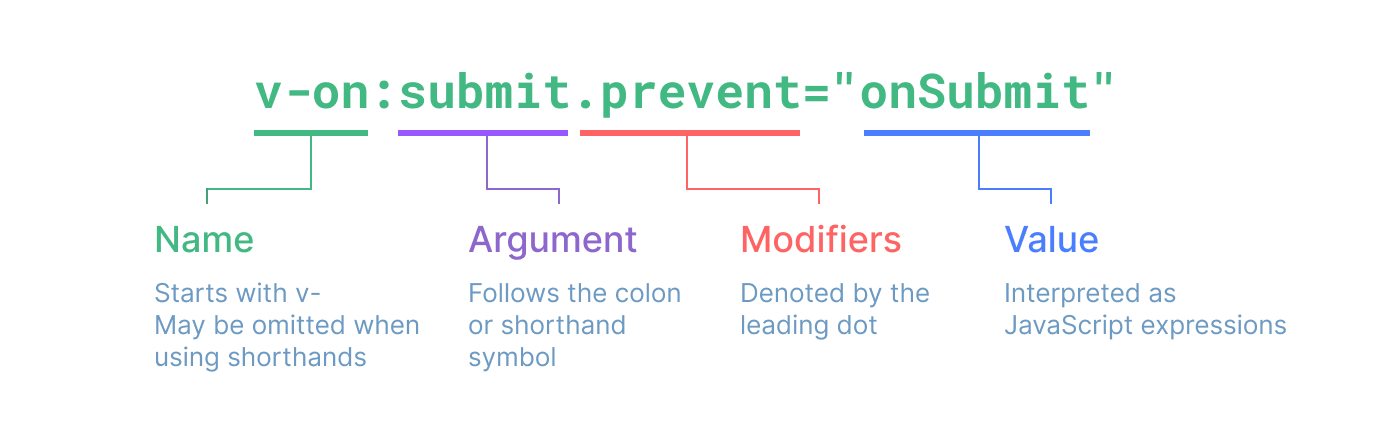

# 响应性基础
## 响应式状态
* 组件的`data`选项是一个方法，会返回一个对象，用来保存组件的状态
* Vue在创建组件实例的时候，会调用`data`方法得到一个“状态”对象，并把它放到响应式系统中（称之为响应式状态）

```js
export default {
  data() {
    return {
      count: 1
    }
  },
  mounted() {
    // `this` 代表组件实例（component instance）
    console.log(this.count) // => 1
    this.count = 2
  }
}
```

* 该对象的所有（顶层）属性都可以通过组件实例直接访问：作为组件实例的属性。也可以在模板中直接访问。
* 注意这些实例属性只会在实例创建时添加；只有实例创建时得到的属性才是响应式的
```js
const App = {
    data() {
        return {
            msg: "hello",
        }
    }
}
const app = Vue.createApp(App)
const vm = app.mount('#app');
console.log(vm.count)
```
```html
<div id="app">
    {{msg}}
</div>
```
* 该状态对象的顶层属性名称应该避免以`$`和`_`开头，因为Vue可能会使用，例如`$data`
* Vue3中的响应式数据是通过JS代理（Proxy)来实现的: 确保使用“组件实例的属性访问形式”来访问响应式数据 (例如上面的`this.count`，`vm.count`)

## 方法选项（methods)

`methods`选项是一个对象，用来包含所需要的方法
* 这些方法的this都会绑定到相应的组件实例上（不要用箭头函数）
* 这些方法跟响应式状态中的数据一样，可以直接以实例属性的形式访问，也可以直接在模板中访问。
```js
export default {
  methods: {
    increment: () => {
      // BAD: no `this` access here!
    }
  }
}
```
```html
<button @click="increment">{{ count }}</button>
```

实例组件会共享相同的方法(methods), 思考以下防抖函数会有什么问题
```js
import { debounce } from 'lodash-es'

export default {
  methods: {
    // Debouncing with Lodash
    newClick: debounce(click, 500) // click是一个函数，例如用于处理鼠标单击事件
  }
}
```
* 防抖功能解释：`newClick=debounce(click,500)`的作用是给一个函数`click`增加”防抖“功能，每次调用newClick函数时，都会延迟500ms再调用原来的click函数，在这500ms的延迟过程中如果有其它次调用newClick, 将会被忽略。

* 这里的`newClick`是**状态性**方法：newClick函数里面有一个数据状态，作为计时器
* 这种状态性方法维护了内部的数据，不同的实例需要有各自的状态数据。如果不同实例使用同一个状态性方法，就会发生数据冲突
* 可以在`created`钩子函数中，给每个实例定义一个独立的方法

```js
export default {
  created() {
    // 每个实例都有各自的newClick函数
    this.newClick = debounce(this.click, 500)
  },
  unmounted() {
    // 还可以在组件卸载时取消状态性函数
    this.newClick.cancel()
  },
  methods: {
    click() {
      // ... 处理鼠标单击事件 ...
    }
  }
}
```

## DOM更新时序 (Update Timing)
响应式状态改变时，DOM会自动更新，但不是同步更新
* Vue会把所有的更新事件存到一个缓存队列里面，直到下一个tick才会更新，这样可以保证只需要更新一次，无论你改变了多少次状态
* 如果想在数据更新完后执行一些操作，可以使用`nextTick`函数

```js
import { nextTick } from 'vue'

export default {
  methods: {
    increment() {
      this.count++
      //这里DOM还没有更新，访问不了更新之后的DOM
      nextTick(() => {
        // 在这里可以访问更新之后的DOM
      })
    }
  }
}
```

关于nextTick函数，可以参考：
* MDN上关于浏览器的事件循环(event loop): [中文](https://developer.mozilla.org/zh-CN/docs/Web/JavaScript/EventLoop) &nbsp; [英文](https://developer.mozilla.org/en-US/docs/Web/JavaScript/EventLoop)
* [stackoverflow上关于nodejs的单线程事件机制](https://stackoverflow.com/a/19823583)

## 深层次响应性 (Deep Reactivity)
默认情况下，Vue的响应式系统是深层次性的。

```js
export default {
  data() {
    return {
      obj: {
        nested: { count: 0 },
        arr: ['foo', 'bar']
      }
    }
  },
  methods: {
    mutateDeeply() {
      // these will work as expected.
      this.obj.nested.count++
      this.obj.arr.push('baz')
    }
  }
}
```
如果想让响应性只发生在顶层，可以使用`shallowReactive`函数

# 计算属性(Computed Property)
模板内直接写JS表达式比较方便，但不适合较复杂的逻辑：代码混乱，难以维护
```js
export default {
  data() {
    return {
      author: {
        name: 'John Doe',
        books: [
          'Vue 2 - Advanced Guide',
          'Vue 3 - Basic Guide',
          'Vue 4 - The Mystery'
        ]
      }
    }
  }
}
```
```html
<p>Has published books:</p>
<span>{{ author.books.length > 0 ? 'Yes' : 'No' }}</span>
```

对于包含响应式数据的逻辑，推荐使用计算属性: 写在computed选项中的函数
```js
export default {
  data() {
    return {
      author: {
        name: 'John Doe',
        books: [
          'Vue 2 - Advanced Guide',
          'Vue 3 - Basic Guide',
          'Vue 4 - The Mystery'
        ]
      }
    }
  },
  computed: {
    // 一个计算属性(只有getter)
    publishedBooksMessage() {
      // `this` 指向组件实例
      return this.author.books.length > 0 ? 'Yes' : 'No'
    }
  }
}
```

计算属性可以当作变量来使用，并且，如果里面有响应式数据，那么它也是”响应式“的
```html
<p>Has published books:</p>
<span>{{ publishedBooksMessage }}</span>
```

也可以使用方法(method)来实现: 也有响应式功能
```js
// in component
methods: {
  calculateBooksMessage() {
    return this.author.books.length > 0 ? 'Yes' : 'No'
  }
}
```
```html
<p>{{ calculateBooksMessage() }}</p>
```

从最终效果上看，两者是等价的。区别在于：
- 计算属性在内部使用了缓存(cache),只有在它的响应式依赖（这里是`author.books`）有变化时，它才会重新计算值。
- 方法在被调用或者重新渲染模板时，始终会执行计算

```js
computed: {
  now() {  //该计算属性永远不会更新，因为它没有响应式依赖
    return Date.now()
  }
}
```

计算属性默认情况下是**只读**的, 在少数情况下，你可能需要一个“可写”的计算属性，通过`setter`来实现

```js
export default {
  data() {
    return {
      firstName: 'John',
      lastName: 'Doe'
    }
  },
  computed: {
    fullName: {
      // getter
      get() {
        return this.firstName + ' ' + this.lastName
      },
      // setter
      set(newValue) {
        [this.firstName, this.lastName] = newValue.split(' ') //解析式赋值
      }
    }
  }
}
```

执行`this.fullName = 'John Doe'`时，Vue会调用`this.fullName.set('John Doe')`

使用计算属性时要注意：
1. `getter`函数应该是一个纯函数,只做纯计算
    - 可以看作一个“数学意义上”的函数，只是将输入值映射到输出值
    - 不能有副作用，例如不能执行异步请求、更新DOM
2. 不要去更改计算属性返回的值，它返回的是一个临时的“快照”（snapshot）；换句话说，这个返回值是“只读”的，改变它的值是无意义的（可以通过改变它的依赖数据来得到一个新的“快照”）
```js
let newName = this.fullName;
newName.firstName = "Even"; // 不会影响到this.fullName 返回的快照
```
虽然`newName`是一个Object （注意Object是引用类型，`newName`和`this.fullName`返回的变量指向的是同一个对象, 但是改变 `newName.firstName` 并不会影响到`this.fullName`

# class和style绑定
HTML的属性值是字符串类型的，对于class和style复杂而又常见的属性，动态变化会涉及到字符串分隔、拼接操作，比较麻烦且易出错

Vue还是使用`v-bind`来对class和style属性做绑定，提供了特殊的语法：
- 属性所绑定的表达式，除了字符串外，还可以是一个Object或Array

## class绑定
### 绑定一个Object
绑定的表达式是一个Object，可以是字面(literal)形式，也可以是其它任意返回Object的表达式形式

```html
<div :class="{ active: isActive }"></div>
```

* Vue根据`isActive`这个表达式的真假性，来（响应式）更新"active"这个类是否存在
* 提示：这里将`v-bind:class`简写成了`:class`

Vue绑定的class可以与html原生的class同时存在，最终结果是取并集
```js
data() {
  return {
    isActive: true,
    hasError: false
  }
}
```
```html
<div
  class="static"
  :class="{ active: isActive, 'text-danger': hasError }"
></div>
```
提示：模板中 `{active: isActive, 'text-danger': hasError}` 会被Vue看作一个JS表达式，其中的`isActive`, `hasError`也是JS表达式(子表达式）

class 绑定的Object也可以不是literal形式的
```js
data() {
  return {
    classObject: {
      active: true,
      'text-danger': false
    }
  }
}
```
```html
<div :class="classObject"></div>
```

当然，也可以使用计算属性（计算属性可以看作一个变量，也是一个表达式）
```js
data() {
  return {
    isActive: true,
    error: null
  }
},
computed: {
  classObject() {
    return {
      active: this.isActive && !this.error,
      'text-danger': this.error && this.error.type === 'fatal'
    }
  }
}
```
```html
<div :class="classObject"></div>
```

### 绑定一个Array
Vue会对Array中每一个表达式求值，然后根据值的类型（字符串、Object)来处理，最后取并集
```js
data() {
  return {
    activeClass: 'active',
    errorClass: 'text-danger',
    isActive: true
  }
}
```
```html
<div :class="[activeClass, errorClass]"></div>
<div :class="[isActive ? activeClass : '', errorClass]"></div>
<div :class="[{ active: isActive }, errorClass]"></div>
```
以上代码会渲染成什么样的元素？

```html
<div class="active text-danger"></div>
```

### 用在子组件上（实例化子组件）
在子组件**实例**上使用class时，如果子组件的模板是单个的根元素，那么Vue会将实例上的class和模板上的class取并集
```html
<!-- 子组件my-component的模板 -->
<p class="foo bar">Hi!</p>
<!-- 在使用子组件时定义class -->
<my-component class="baz boo"></my-component>
```
Vue会生成
```html
<p class="foo bar baz boo">Hi</p>
```
这里的class是html原生的属性，换成Vue的class绑定也是一样的
```html
<my-component :class="{ active: isActive }"></my-component>
```

<div class="warn">如果子组件（模板）有多个根元素呢？</div>

```html
<!-- 在使用子组件时，在实例上定义class -->
<my-component class="baz boo"></my-component>
```

```html
<!-- 以下是子组件模板 -->
<p>Hi!</p>
<span>This is a child component</span>
```
子组件模板有多个根元素时，实例调用上定义的class不会自动生效，需要使用`$attrs`手动地“接收”实例上的class

```html
<p :class="$attrs.class">Hi!</p>
<span>This is a child component</span>
```

## style 绑定
除了字符串外，style也可以绑定Object或Array
### 绑定一个Object
style绑定一个Object，等价于JS中元素的`style`属性(property)
```js
data() {
  return {
    activeColor: 'red',
    fontSize: 30
  }
}
```
```html
<div :style="{ color: activeColor, fontSize: fontSize + 'px' }"></div> 
<div :style="{ 'font-size': fontSize + 'px' }"></div>
```
* style里面的css属性名称推荐用驼峰法（Vue会转换成相应的连字符名称），
* 也可以用连字符法（与css的写法一致）
* css属性值是一个表达式（该表达式的值的类型为字符串）

推荐直接绑定一个Object变量，更加“干净"
```js
data() {
  return {
    styleObject: {
      color: 'red',
      fontSize: '13px'
    }
  }
}
```
```html
<div :style="styleObject"></div>
```
当然，这里也可以用计算属性

### 绑定一个Array
数组中每个元素都是一个Object, 这些Object定义的style会融合到一起（并集）
```html
<div :style="[baseStyles, overridingStyles]"></div>
```

### 两个特殊功能：
1. auto-prefix：css属性值不需要加vendor prefix，Vue会在有需要的时候自动加上合适的(通过查询浏览器类型）

2. style（里面的）css属性值可以是一个数组，最后那个浏览器支持的值起作用
```
<div :style="{ display: ['-webkit-box', '-ms-flexbox', 'flex'] }"></div>
```


# 条件渲染(Conditional Rendering)
在某个元素上使用`v-if`指令，可以根据表达式的真假来控制该元素的渲染
```html
<h1 v-if="awesome">Vue is awesome!</h1>
```
如果表达式awesome为真，以上元素会渲染，否则不渲染（响应式更新）。  
与常见编程语言一样，可以结合使用`v-else-if`,`v-else`
```html
<div v-if="type === 'A'">
  A
</div>
<div v-else-if="type === 'B'">
  B
</div>
<div v-else-if="type === 'C'">
  C
</div>
<div v-else>
  Not A/B/C
</div>
```

`v-if`是一个指令，必须存在某个元素上，如果想控制多个元素，可以使用`template`标签作为一个“不可见”的包裹
```html
<template v-if="ok">
  <h1>Title</h1>
  <p>Paragraph 1</p>
  <p>Paragraph 2</p>
</template>
```
“不可见”指的是, `v-if`表达式（这里是`ok`)为真时，只会渲染里面的元素（`template`这个包裹标签不会渲染）  
`v-else-if`和`v-else`都可以用在`template`上

也可以使用`v-show`来实现“条件性显示”的功能
```html
<h1 v-show="ok">Hello!</h1>
```
区别在于，`v-show`会始终渲染（一直存在DOM中），它只是在“切换”元素的display属性  
`v-show`不支持`template`和`v-else`

v-if vs. v-show
* `v-if`是真正的条件性渲染：在“切换”过程中，上面的事件监听器和里面的子组件会相应地被销毁和重生成。
* `v-if`是惰性的：初始化渲染时，如果表达式为假，它什么事都不会做
* `v-show`是始终会渲染的，表达式的真假只是控制display属性

一般来说，`v-if`的切换开销更大，而`v-show`的初始化渲染开销更大。在需要经常切换时推荐用`v-show`, 在条件不怎么变化时推荐用`v-if`

不建议在同一个元素上使用`v-if`和`v-for`。若同时用在某个元素上，则`v-if`会优先执行。

# 列表渲染(List Rendering)
指令`v-for`用于渲染一个列表（数组），语法`v-for="item in items"`，其中
* item是在定义一个变量，名字可以随意起（前提是不要跟其它变量冲突）
* items是一个”可迭代数据“（一般是一个数组）

```js
data() {
  return {
    items: [{ message: 'Foo' }, { message: 'Bar' }]
  }
}
```
```html
<li v-for="item in items">
  {{ item.message }}
</li>
```
* 在`v-for`的作用域(scope)内，可以访问外面的变量，但item是局部变量，只能在`v-for`里面访问  
* 可以使用一个额外的参数来获取下标

```html
<li v-for="(item, index) in items">
  {{ parentMessage }} - {{ index }} - {{ item.message }}
</li>
```

`v-for`的使用与JS中的`forEach`函数很像
```js
const parentMessage = 'Parent'
const items = [
  {message:'h', n: 1},
  {message:'a', n: 2},
]

items.forEach((item, index) => {
  // 这里可以访问 `parentMessage`
  // 但是 `item` 和 `index` 只能用在这个块里面
  console.log(parentMessage, item.message, index)
})
```
因此，`v-for`也可以使用destructruing
```html
<li v-for="{ message } in items">
  {{ message }}
</li>
<!-- with index alias -->
<li v-for="({ message }, index) in items">
  {{ message }} {{ index }}
</li>
```


使用多层`v-for`时，变量的作用域(scope)与嵌套函数一样
```html
<li v-for="item in items">
  <span v-for="childItem in item.children">
    {{ item.message }} {{ childItem }}
  </span>
</li>
```
在`v-for`表达式中，可以使用`of`代替`in`，这跟JS的迭代器语法更相近

## 用于Object
`v-for`用于Object时，迭代的是属性值（不是属性名）
```js
data() {
  return {
    myObject: {
      title: 'How to do lists in Vue',
      author: 'Jane Doe',
      publishedAt: '2016-04-10'
    }
  }
}
```
```html
<ul>
  <li v-for="value in myObject">
    {{ value }}
  </li>
</ul>
```

可以使用第2个参数来访问属性名，第3个参数来访问下标
```html
<li v-for="(value, key) in myObject">
  {{ key }}: {{ value }}
</li>
<li v-for="(value, key, index) in myObject">
  {{ index }}. {{ key }}: {{ value }}
</li>
```
迭代Object时，顺序基于`Object.keys()`的顺序，不同的JS引擎可能会导致不同的结果。

## 用于Range
除了Array和Object外，`v-for`还能用于一个整数
```html
<span v-for="n in 10">{{ n }}</span> 
```
以上显示1至10 (注意是从1开始，不是从0开始)

## 用在`<template>`上
与`v-if`一样， `v-for`也可用于`<template>`上
```html
<ul>
  <template v-for="item in items">
    <li>{{ item.msg }}</li>
    <li class="divider" role="presentation"></li>
  </template>
</ul>
```

## 与`v-if`同时使用
用在同一个元素上时，`v-if`的优先级更高
```html
<li v-for="todo in todos" v-if="!todo.isComplete">
  {{ todo.name }}
</li>
```
以上代码会报错，因为`v-if`的表达式中不能访问`v-for`的变量

思考：如何解决？

```html
<template v-for="todo in todos">
  <li v-if="!todo.isComplete">
    {{ todo.name }}
  </li>
</template>
```

## 使用key来维护状态
在更新`v-for`生成的列表时，默认情况下，Vue会使用`in-place patch`策略：
- 如果数据项的顺序有变化，Vue不会”移动"相应的DOM元素，而是在相应的元素上做补丁（patch)

这种默认模式更加高效，但是需要满足：
- 列表渲染结果不依赖于子组件的状态或者临时的DOM状态（例如表单input值)

为了让Vue能跟踪每项的identity,从而可以复用和重排已存在的元素，需要为每一项提供一个"独一无二”的key值

```html
<div v-for="item in items" :key="item.id">
  <!-- content -->
</div>
```

* 不要使用下标作为key值
* 这里的`key`与迭代Object时的`key`不是一回事，不要搞混
* 尽可能给所有的`v-for`加上`key`值，除非：
    - 迭代的DOM元素不包括组件，也不包括状态性的html元素
    - 你是故意想使用默认模式

## 用于组件上
可以直接在组件(component)上使用`v-for`, 但是不会自动传递数据,因为组件有它们自己的、与外界隔离的作用(scope)
```html
<my-component v-for="item in items" :key="item.id"></my-component>
```
以上代码中的`item`数据不会传到`my-component`中，需要使用props传递。
```html
<my-component
  v-for="(item, index) in items"
  :item="item"
  :index="index"
  :key="item.id"
></my-component>
```
思考：为什么不自动传递数据？

答：防止耦合。这样可以使得组件复用在其它场景中。

## 侦听数组变化
Array的方法中，mutation类型的方法会被Vue侦听到：这些方法会触发DOM更新
* push()
* pop()
* shift()
* unshift()
* splice()
* sort()
* reverse()

mutaion方法是指调用该方法会更改原始数组。相对而言，non-mutation方法不会更改原始数组，而是返回一个新的数组。
```js
this.items = this.items.filter((item) => item.message.match(/Foo/))
```
注意：这里Vue并不会重新生成新的列表，而是会尽可能地重用原有的列表（最大化DOM元素的复用）。所以，新的数组与原数组有相同的元素时，这个操作效率是非常高的。

## 使用数组过滤或排序
有时我们不想更改数组，但是想输出过滤或排序的数组(同时保持响应性），怎么办？

使用计算属性(computed property)或选项方法（methods)
```js
data() {
  return {
    numbers: [1, 2, 3, 4, 5]
  }
},
computed: {
  evenNumbers() {
    return this.numbers.filter(n => n % 2 === 0)
  }
  orderedNumbers(){
      return [...this.numbers].sort()
  }
}
```

# 课程信息

本课程只学习Vue3，不学以前的版本
* 官方网站: [中文](https://v3.cn.vuejs.org/) &nbsp; [英文](https://vuejs.org/)
* 从Vue2迁移到Vue3: [中文](https://v3.cn.vuejs.org/guide/migration/introduction.html) &nbsp; [英文](https://v3-migration.vuejs.org/)

官网有详细的文档，包括教程、示例、参考手册，还有在线playground、第三方课程等信息  
Design Principles of Vue 3.0 by Evan You：[B站](https://www.bilibili.com/video/av883407632/)

## 考核方式：平时表现10% + 平时作业40% + 期末大作业50%
* 平时表现由考勤和课堂积极性组成
* 平时作业暂定是4次
* 期末大作业形式和题目待定

## 联系方式
* 微信
* 学习通（这个我不经常看，急事尽量不要用这个）
* 邮件：iguyong@icloud.com
* 办公地点：麦庐校区荟庐H129

## 参考资料：

* Javascript权威指南（第7版）英文名：JavaScript: The Definitive Guide: Master the World's Most-Used Programming Language (7th Edition)
* W3School: [中文网站](https://w3school.com.cn) &nbsp; [英文网站](https://w3schools.com)
* MDN: [中文](https://developer.mozilla.org/zh-CN/docs/Web) &nbsp; [英文](https://developer.mozilla.org/en-US/)
* 后续补充